In [1]:
import os
import numpy as np
import mne
print (mne.__version__)
from scipy.io import loadmat, savemat
from mne.io import read_raw_egi, read_raw_fif
import matplotlib.pyplot as plt
%matplotlib notebook
from mne.preprocessing import ICA, create_eog_epochs, create_ecg_epochs
#from EEG_pareidolia_utils import get_pareidolia_bids

0.19.2


In [2]:
def get_pareidolia_bids(FOLDERPATH, subj, task , run, stage, cond=None):
    '''
    Constructs BIDS basename and filepath in the SAflow database format.
    '''
    if 'eeg' in stage:
        extension = '.fif'
    if 'preproc' in stage:
        extension = '_raw.fif'
    if 'epo' in stage: # determine extension based on stage
        extension = '.fif'
    if 'PSD' in stage:
        extension = '.mat'
    if 'Morlet' in stage:
        extension = '.npy'
    if 'report' in stage:
        extension = '.html'
    if 'behav' in stage:
        extension = '.csv'
    elif 'Complexity' in stage:
        extension = '.mat'
    elif 'sources' in stage:
        extension = '.hd5'
    elif 'events' in stage:
        extension = '.tsv'
    elif 'ARlog' in stage:
        extension = '.hdf5'

    if 'events' in stage:
        pareidolia_bidsname = 'sub-{}_ses-EEG_task-{}_run-{}_{}{}'.format(subj, task, run, stage, extension)
    else:
        if cond == None: # build basename with or without cond
            pareidolia_bidsname = 'sub-{}_ses-EEG_task-{}_run-{}_{}{}'.format(subj, task, run, stage, extension)
        else:
            pareidolia_bidsname = 'sub-{}_ses-EEG_task-{}_run-{}_{}_{}{}'.format(subj, task, run, cond, stage, extension)

    pareidolia_bidspath = os.path.join(FOLDERPATH, 'sub-{}'.format(subj), 'ses-EEG', 'eeg', pareidolia_bidsname)
    return pareidolia_bidsname, pareidolia_bidspath

In [4]:
FOLDERPATH = r'E:\PhD\EEG_data\Pareidolia_BIDS' #You need to replace that path in order to indicate where the 
subj = '02'                                     #folder Pareidolia_BIDS is 
task = 'pareidolia'
#Here you can choose between run 1, 2, 3 or 4 (run 4 being the sham-feedback condition)
run = '2'
filename, filepath = get_pareidolia_bids(FOLDERPATH, subj, task, run, stage = 'eeg', cond=None)

In [6]:
#This function reads the .fif file indicated by the variable 'filepath'
raw_data = read_raw_fif(filepath, preload=True)

Opening raw data file E:\PhD\EEG_data\Pareidolia_BIDS\sub-02\ses-EEG\eeg\sub-02_ses-EEG_task-pareidolia_run-2_eeg.fif...


<ipython-input-6-c13f39fce1e4>:2: RuntimeWarning: This filename (E:\PhD\EEG_data\Pareidolia_BIDS\sub-02\ses-EEG\eeg\sub-02_ses-EEG_task-pareidolia_run-2_eeg.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  raw_data = read_raw_fif(filepath, preload=True)


    Range : 0 ... 1709787 =      0.000 ...  1709.787 secs
Ready.
Reading 0 ... 1709787  =      0.000 ...  1709.787 secs...


In [5]:
preproc_name, preproc_path = get_pareidolia_bids(FOLDERPATH, '01', 'pareidolia', '2', stage = 'preproc')
preproc = mne.io.read_raw_fif(preproc_path)

Opening raw data file E:\PhD\EEG_data\Pareidolia_BIDS\sub-01\ses-EEG\eeg\sub-01_ses-EEG_task-pareidolia_run-2_preproc_raw.fif...
    Range : 0 ... 1488609 =      0.000 ...  1488.609 secs
Ready.


In [ ]:
raw_data.info # For example, you can use the method "info" to look at the informations about your data

In [ ]:
raw_data.info.get('ch_names')

In [ ]:
#Order is created to choose the channels to vizualise.
order = list(range(40,61))
raw_data.plot(show=False, start = 1000);

In [7]:
#Define channels of interest
EOG_chs = ['E1', 'E8', 'E25', 'E32', 'E126', 'E127']
Unwanted = ['E43', 'E48', 'E49', 'E128', 'E113', 'E120', 'E125', 'E119', 'E129']
All_chs = raw_data.info['ch_names'][0:129]
EEG_chs = [ele for ele in All_chs if ele not in Unwanted]
EEG_chs = [ele for ele in EEG_chs if ele not in EOG_chs]

#Plot the Power Spectrum Density plot for all electrodes; this graph represents the power over all frequencies for
#the entire period of the raw data file.
#raw_data.plot_psd(average=False, picks=EEG_chs, xscale = 'lin', fmin = 0.5, fmax = 80, n_overlap = 1024);

In [10]:
## Adding x, y positions of electrodes
mon = mne.channels.read_montage('GSN-HydroCel-128')
raw_data = raw_data.set_montage(mon)

C:\Users\Dell\Anaconda3\lib\site-packages\mne\utils\docs.py:830: DeprecationWarning: Function read_montage is deprecated; ``read_montage`` is deprecated and will be removed in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_custom_montage``, or ``read_dig_captrack`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\mne\utils\docs.py:813: DeprecationWarning: Class Montage is deprecated; Montage class is deprecated and will be removed in v0.20. Please use DigMontage instead.
  warnings.warn(msg, category=DeprecationWarning)
<ipython-input-10-f4b1e01638e8>:3: DeprecationWarning: Setting a montage using anything rather than DigMontage is deprecated and will raise an error in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_dig_polhemu

In [7]:
high_cutoff = 150
low_cutoff = 0.5
raw_data.filter(low_cutoff, high_cutoff, fir_design="firwin")
raw_data.notch_filter(np.arange(60, high_cutoff+1, 60), picks=EEG_chs, filter_length='auto',phase='zero', fir_design="firwin")

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1.5e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 150.00 Hz
- Upper transition bandwidth: 37.50 Hz (-6 dB cutoff frequency: 168.75 Hz)
- Filter length: 6601 samples (6.601 sec)

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 6601 samples (6.601 sec)



<Raw  |  sub-02_ses-EEG_task-pareidolia_run-2_eeg.fif, n_channels x n_times : 143 x 1709788 (1709.8 sec), ~1.82 GB, data loaded>

In [ ]:
raw_data.plot_psd(average=False, picks=EEG_chs, show=False, xscale = 'lin', fmin = 0.5, fmax = 80, n_overlap = 1024);

Fitting ICA to data using 114 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selection by number: 20 components
Fitting ICA took 31.2s.


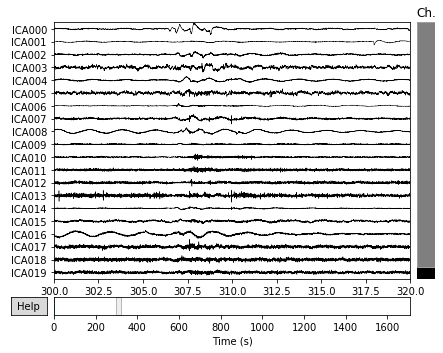

In [8]:
##Ici, nous faisant une Independant Component Analysis, permettant de décomposer le signal en différentes composantes. 
##Cela va nous permettre de corréler certaines de ces composantes avec le signal cardiaque (ECG) et oculaire (EOG) afin
##d'exclure la plus grande partie de cette activité de nos analyses.
ica = ICA(n_components=20, random_state=0).fit(raw_data, decim=3, picks = EEG_chs)
ica.plot_sources(raw_data, show=False, start = 300);

Using channel ECG to identify heart beats.
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 16384 samples (16.384 sec)

Number of ECG events detected : 2459 (average pulse 86 / min.)
2459 matching events found
No baseline correction applied
Not setting metadata
Loading data for 2459 events and 1001 original time points ...
1 bad epochs dropped


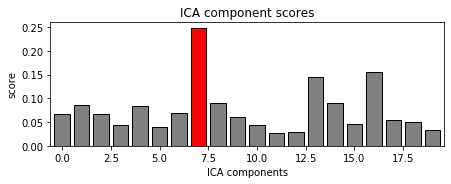

    Using multitaper spectrum estimation with 7 DPSS windows
2458 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


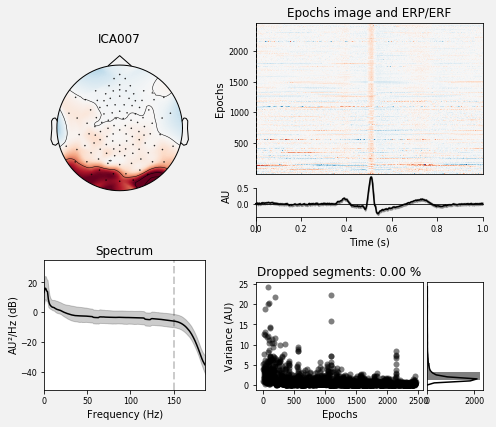

In [9]:
# First, we will start by looking for the component(s) that captured cardiac activity.
ecg_threshold = 0.20 #This parameter needs to be modify to reach the threshold that rules out ICA component(s) that correlate the most with ECG activity
ecg_epochs = create_ecg_epochs(raw_data, ch_name='ECG')# This function will detect cardiac events (heartbeats) on the ECG signal
                                                      # and store their timestamps in "ecg_epochs".
ecg_inds, ecg_scores = ica.find_bads_ecg(ecg_epochs, ch_name='ECG', method='ctps', threshold=ecg_threshold)
ica.plot_scores(ecg_scores, ecg_inds, show=True);
ica.plot_properties(ecg_epochs, picks=ecg_inds, image_args={'sigma': 1.}, show=True);

Using channel E127 as EOG channel
EOG channel index for this subject is: [126]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 16384 samples (16.384 sec)

Now detecting blinks and generating corresponding events
Found 219 significant peaks
Number of EOG events detected : 219
219 matching events found
No baseline correction applied
Not setting metadata
Loading data for 219 events and 1001 original time points ...
0 bad epochs dropped
Using channel E127 as EOG channel


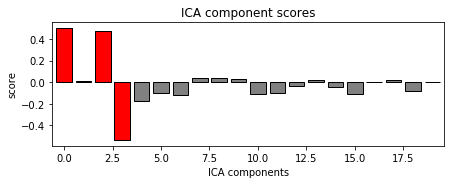

    Using multitaper spectrum estimation with 7 DPSS windows
219 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
219 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
219 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


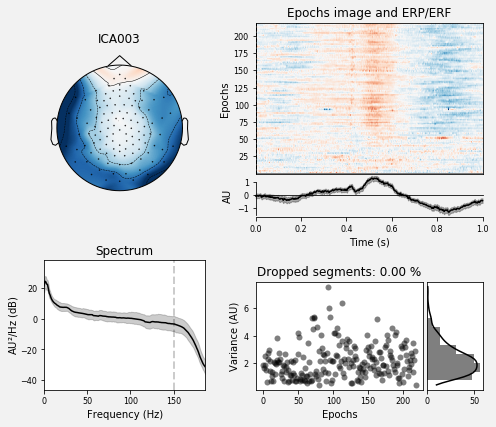

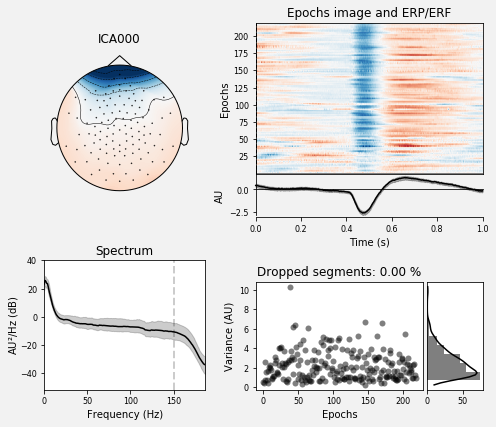

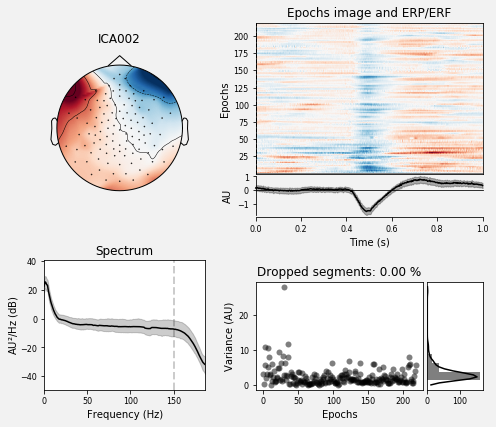

In [12]:
# Now, let's do the same for ocular blinks. Note that two things have changed :
# - The functions used to detect artifacts are now called "eog" instead of "ecg"
# - The channel to which we correlate our components is now whether 'E127', or 'E126', the EOG channels just below the eye

eog_threshold = 2.5
eog_epochs = create_eog_epochs(raw_data, ch_name='E127')
eog_inds, eog_scores = ica.find_bads_eog(eog_epochs, ch_name='E127', threshold=eog_threshold)

ica.plot_scores(eog_scores, eog_inds, show=True);
ica.plot_properties(eog_epochs, picks=eog_inds, image_args={'sigma': 1.}, show=True);

In [ ]:

ica.exclude = ecg_inds # Exclude cardiac (ECG) or blinks (EOG) components 
ica.apply(raw_data)
ica.exclude = eog_inds 
ica.apply(raw_data)
raw_data.plot(order = order, start = 1000); # Plot the clean signal.